# Random Forest Classifier

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

np.random.seed(0)
%matplotlib inline

In [29]:
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, .75)
Xtr,Ytr = ml.shuffleData(Xtr,Ytr)

There are three hyper-parameters that are relevant to decition tree's performance;
maxDepth, minParent, and minLeaf, where the latter two specify the minimum number of data points
necessary to split a node and form a node, respectively.
First, we will examine the optimal depth to predict our data.

In [53]:
depths = np.arange(50)

training_auc = []
validation_auc = []

for d in depths:
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=d, minParent=2, minLeaf=1)
    training_auc.append(learner.auc(Xtr, Ytr))
    validation_auc.append(learner.auc(Xva, Yva))

Best depth: 16
Best AUC: 0.70371


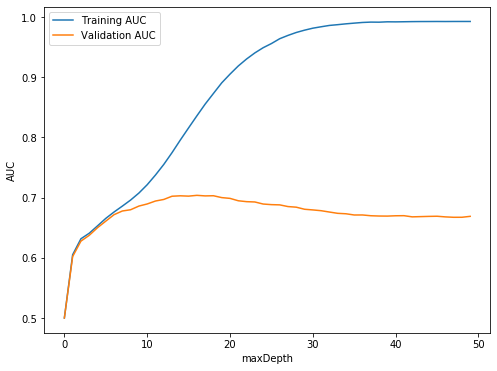

In [55]:
bestDepth, bestAUC = np.argmax(validation_auc), np.max(validation_auc)

print('Best depth:', bestDepth)
print('Best AUC: %.5f' % bestAUC)

_, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(depths, training_auc, label="Training AUC")
ax.plot(depths, validation_auc, label="Validation AUC")
ax.set_xlabel("maxDepth")
ax.set_ylabel("AUC")
ax.legend()
plt.show()

It seems like 0.70 is our best AUC with depth 16 and our Kaggle score is 0.71022. Now, we trying to find each different minParent or minLeaf affect our performance.

In [219]:
leafs = np.arange(25)+1
parents = np.arange(25)+1

leaf_aucTr = []
leaf_aucVa = []

parent_aucTr = []
parent_aucVa = []

for l in leafs:
    minLeaf_learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=20, minLeaf=l)
    leaf_aucTr.append(minLeaf_learner.auc(Xtr, Ytr))
    leaf_aucVa.append(minLeaf_learner.auc(Xva, Yva))
for p in parents:
    minParent_learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=20, minParent=p)
    parent_aucTr.append(minParent_learner.auc(Xtr, Ytr))
    parent_aucVa.append(minParent_learner.auc(Xva, Yva))

Best minLeaf: 12
Best AUC: 0.71211
Best minParent: 22
Best AUC: 0.70969


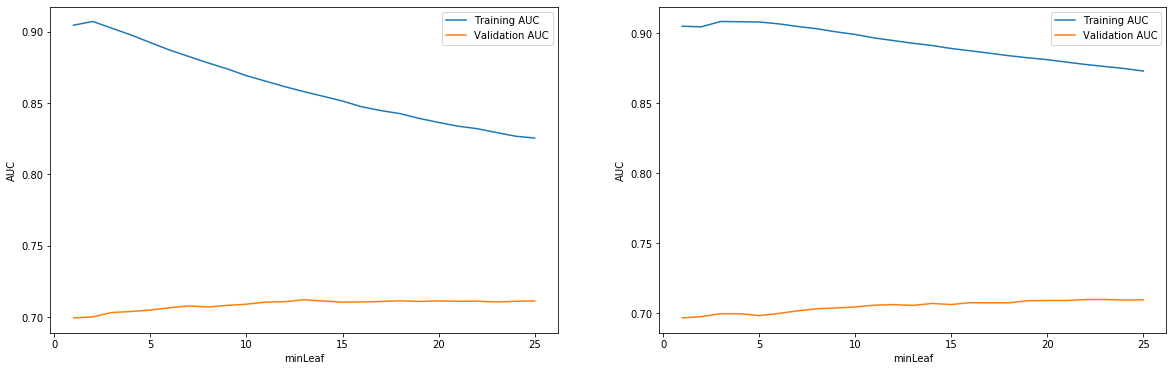

In [220]:
bestMinLeaf, best_lAUC = np.argmax(leaf_aucVa), np.max(leaf_aucVa)
bestMinParent, best_pAUC = np.argmax(parent_aucVa), np.max(parent_aucVa)

print('Best minLeaf:', bestMinLeaf)
print('Best AUC: %.5f' % best_lAUC)

print('Best minParent:', bestMinParent)
print('Best AUC: %.5f' % best_pAUC)

_, ax = plt.subplots(1, 2, figsize=(20,6))

ax[0].plot(leafs, leaf_aucTr, label="Training AUC")
ax[0].plot(leafs, leaf_aucVa, label="Validation AUC")
ax[0].set_xlabel("minLeaf")
ax[0].set_ylabel("AUC")
ax[0].legend()

ax[1].plot(parents, parent_aucTr, label="Training AUC")
ax[1].plot(parents, parent_aucVa, label="Validation AUC")
ax[1].set_xlabel("minLeaf")
ax[1].set_ylabel("AUC")
ax[1].legend()

plt.show()

In [217]:
print(leaf_aucTr)

[0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025, 0.9925386140190025]


Let's see if we can do better by modifying minParent and minLeaf. In this experiment, we will use heat map to plot the AUC to see what our best combination of minParent and minLeaf is.

In [52]:
#start from minParent = 5 and minLeaf = 5, step = 2
minParent = range(5,26,2) 
minLeaf = range(5,26,2) 

tr_auc = np.zeros((len(minParent),len(minLeaf)))
va_auc = np.zeros((len(minParent),len(minLeaf)))

for i,p in enumerate(minParent):
    for j,l in enumerate(minLeaf):
        leaf_learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=20, minParent=p, minLeaf=l)
        tr_auc[i][j] = leaf_learner.auc(Xtr, Ytr)
        va_auc[i][j] = leaf_learner.auc(Xva, Yva)

Best minParent: 19
Best minLeaf: 13
Best AUC: 0.71220


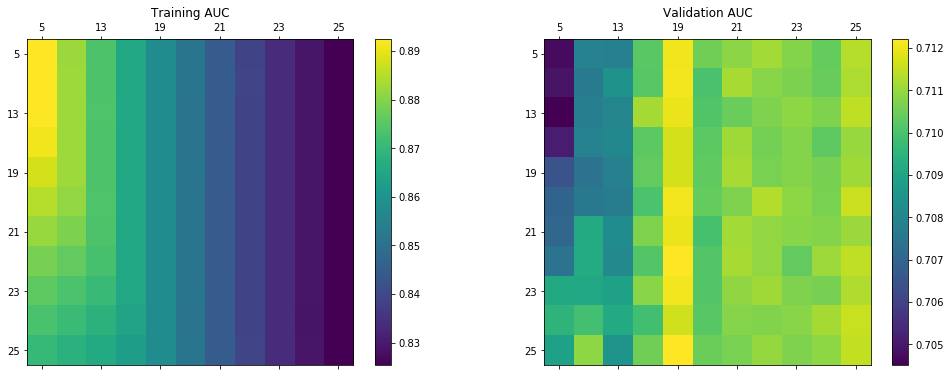

In [160]:
maxIndex = np.unravel_index(va_auc.argmax(),va_auc.shape)
bestAUC = np.max(va_auc)

print('Best minParent:', minParent[maxIndex[0]])
print('Best minLeaf:', minLeaf[maxIndex[1]])
print('Best AUC: %.5f' % bestAUC)


f, ax = plt.subplots(1, 2, figsize=(17,6))
heatmapTr = ax[0].matshow(tr_auc, interpolation='nearest')
f.colorbar(heatmapTr, ax = ax[0])

ax[0].set_xticklabels(['',5,13,19,21,23,25])
ax[0].set_yticklabels(['',5,13,19,21,23,25])
ax[0].set_title('Training AUC')

heatmapVa = ax[1].matshow(va_auc, interpolation='nearest')
f.colorbar(heatmapVa, ax = ax[1])

ax[1].set_xticklabels(['',5,13,19,21,23,25])
ax[1].set_yticklabels(['',5,13,19,21,23,25])
ax[1].set_title('Validation AUC')

plt.show()

It's slightly better now.

Next, we will try to implement BaggedTree.

In [182]:
class BaggedTree(ml.base.classifier):
    def __init__(self, learners):
        """Constructs a BaggedTree class with a set of learners. """
        self.learners = learners
    
    def predictSoft(self, X):
        """Predicts the probabilities with each bagged learner and average over the results. """
        n_bags = len(self.learners)
        preds = [self.learners[l].predictSoft(X) for l in range(n_bags)]
        return np.mean(preds, axis=0)

The idea for the random forest is that we train a bunch of trees with 10000 data poitns. We will see which are the optimal max depth, minLeaf and minParent

Best feature: 1
Best AUC: 0.71220


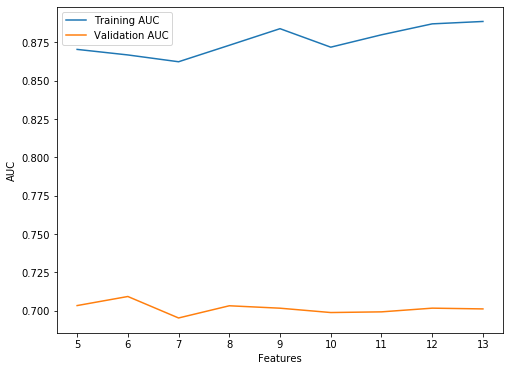

In [164]:
testTr_auc = []
testVa_auc = []
features = np.arange(5,14)
for f in features:
    test_learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=19, minParent=2, minLeaf=1, nFeatures = f)
    testTr_auc.append(test_learner.auc(Xtr, Ytr))
    testVa_auc.append(test_learner.auc(Xva, Yva))

Best number of features: 6
Best AUC: 0.70928 


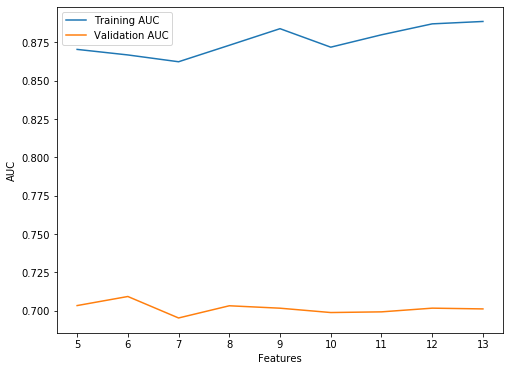

In [180]:
bestFeature, best_testAUC = np.argmax(testVa_auc), np.max(testVa_auc)

print('Best number of features:', features[bestFeature])
print('Best AUC: %.5f ' % best_testAUC)

_, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(features, testTr_auc, label="Training AUC")
ax.plot(features, testVa_auc, label="Validation AUC")
ax.set_xlabel("Features")
ax.set_ylabel("AUC")
ax.legend()
plt.show()

Now, we will try to train 2000 desision trees each tree with only 6 features. There is 1000 tree are trained with maxDepth = 19  and the others are trained with minLeaf = 13 , minParent =19. Then we will use baggedTrees to combine them.

In [185]:
nBags = 200
trees = []
for l in range(10):
    Xi, Yi = ml.bootstrapData(Xtr, Ytr, Xtr.shape[0])
    tree = ml.dtree.treeClassify(Xi, Yi,maxDepth=16, nFeatures = 6)
    trees.append(tree)
for i in range(10):
    Xi, Yi = ml.bootstrapData(Xtr, Ytr, Xtr.shape[0])
    tree = ml.dtree.treeClassify(Xi, Yi, minParent=19 ,minLeaf =13, nFeatures = 6)
    trees.append(tree)

We will try to train 20 more trees using only 100,000 data points with all features.

In [195]:
for l in range(10):
    Xi, Yi = ml.bootstrapData(Xtr, Ytr, 100000)
    tree = ml.dtree.treeClassify(Xi, Yi,maxDepth=16)
    trees.append(tree)
for i in range(10):
    Xi, Yi = ml.bootstrapData(Xtr, Ytr, 100000)
    tree = ml.dtree.treeClassify(Xi, Yi, minParent=19 ,minLeaf =13)
    trees.append(tree)

This slightly increased our AUC. Let's train 20 more trees with maxDepth = 20, minLeaf = 4 and nFeatures = 8

In [198]:
for i in range(10):
    Xi, Yi = ml.bootstrapData(Xtr, Ytr, Xtr.shape[0])
    tree = ml.dtree.treeClassify(Xi, Yi, maxDepth = 20, minParent=19 ,minLeaf =13, nFeatures = 6)
    trees.append(tree)
for i in range(10):
    Xi, Yi = ml.bootstrapData(Xtr, Ytr, 100000)
    tree = ml.dtree.treeClassify(Xi, Yi, maxDepth = 20, minParent=19 ,minLeaf =13)
    trees.append(tree)
for i in range(20):
    Xi, Yi = ml.bootstrapData(Xtr, Ytr, Xtr.shape[0])
    tree = ml.dtree.treeClassify(Xi, Yi, maxDepth = 20,minLeaf = 4, nFeatures = 8)
    trees.append(tree)

It seems like random forest is doing well. We will try to use all the data we have to train 70 more trees

In [204]:
for i in range(20):
    Xi, Yi = ml.bootstrapData(X, Y, X.shape[0])
    tree = ml.dtree.treeClassify(Xi, Yi, maxDepth = 16, nFeatures = 6)
    trees.append(tree)
for i in range(20):
    Xi, Yi = ml.bootstrapData(X, Y, 100000)
    tree = ml.dtree.treeClassify(Xi, Yi, maxDepth = 20, minParent=19 ,minLeaf =13)
    trees.append(tree)
for i in range(10):
    Xi, Yi = ml.bootstrapData(X, Y, X.shape[0])
    tree = ml.dtree.treeClassify(Xi, Yi, maxDepth = 20, minParent=19 ,minLeaf =13, nFeatures = 6)
    trees.append(tree)
for i in range(20):
    Xi, Yi = ml.bootstrapData(X, Y, Xtr.shape[0])
    tree = ml.dtree.treeClassify(Xi, Yi, maxDepth = 20,minLeaf = 4, nFeatures = 8)
    trees.append(tree)

In [210]:
for i in range(50):
    Xi, Yi = ml.bootstrapData(X, Y, X.shape[0])
    tree = ml.dtree.treeClassify(Xi, Yi, maxDepth = 16, nFeatures = 6)
    trees.append(tree)
for i in range(50):
    Xi, Yi = ml.bootstrapData(X, Y, 100000)
    tree = ml.dtree.treeClassify(Xi, Yi, maxDepth = 20, minParent=19 ,minLeaf =13)
    trees.append(tree)
for i in range(50):
    Xi, Yi = ml.bootstrapData(X, Y, X.shape[0])
    tree = ml.dtree.treeClassify(Xi, Yi, maxDepth = 20, minParent=19 ,minLeaf =13, nFeatures = 6)
    trees.append(tree)
for i in range(50):
    Xi, Yi = ml.bootstrapData(X, Y, X.shape[0])
    tree = ml.dtree.treeClassify(Xi, Yi, maxDepth = 20,minLeaf = 4, nFeatures = 8)
    trees.append(tree)

In [211]:
print('nBags:', len(trees))
randomForest = BaggedTree(trees)
randomForest.classes = np.unique(Y)
print("Train AUC: % .5f" %randomForest.auc(X,Y))
print("Valitdation: AUC %.5f" %randomForest.auc(Xva,Yva))

nBags: 740
Train AUC:  0.89995
Valitdation: AUC 0.89083


| nBags | Training AUC | Validation AUC |
| --- | --- | --- |
| 20 | 0.90926 | 0.76823 |
| 40 | 0.90921 | 0.76919 |
| 80 | 0.91853 | 0.77278 |
| 150 | 0.89441 | 0.83965 |
| 340 | 0.89789 | 0.87589 |
| 540 | 0.89845 | 0.88526 |
| 740 | 0.89995 | 0.89083 |

In [212]:
submit(randomForest)

In [201]:
def submit(learner):
    Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
    Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
    # Output a file with two columns, a row ID and a confidence in class 1:
    np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')